**Data Identitas**
<br>
Nama : Galang Setia Nugroho


In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2022-06-23 03:08:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2022-06-23 03:08:43 ERROR 404: The specified resource does not exist..



In [2]:
# Import Library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile
import os
import shutil

In [3]:
# Melakukan ekstraksi dataset
# Dataset harus di upload terlebih dahulu
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [4]:
base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

if not os.path.exists(train_dir):
  os.mkdir(train_dir)
else :
  print('Direktori train sudah dibuat')
  
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)
else :
  print('Direktori validation sudah dibuat')

In [5]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [6]:
# Membuat direktori train dan validasi kelas 
if not os.path.exists(train_rock) :
  os.mkdir(train_rock)
else :
  print('train rock exist')

if not os.path.exists(train_paper) :
  os.mkdir(train_paper)
else:
  print('train paper exist')
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
else:
  print('train scissors exist')

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
else :
  print('validation rock exist')

if not os.path.exists(val_paper):
  os.mkdir(val_paper)
else :
  print('validation paper exist')

if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)
else:
  print('validation scissors exist')

In [7]:
# Set validasi to 40%
train_roc_dir, val_roc_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [8]:
# Copy path ke setiap folder kelas
for file in train_roc_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [9]:
# Proses augmentasi gambar
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_data = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [10]:
# Load data generator
train_gen = train_data.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

valid_gen = test_data.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
# Membuat model CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
# Latih model
model.fit(
    train_gen,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = valid_gen,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2
)

Epoch 1/20
41/41 - 82s - loss: 1.0912 - accuracy: 0.4680 - val_loss: 0.7038 - val_accuracy: 0.7130 - 82s/epoch - 2s/step
Epoch 2/20
41/41 - 79s - loss: 0.4808 - accuracy: 0.8209 - val_loss: 0.3322 - val_accuracy: 0.8889 - 79s/epoch - 2s/step
Epoch 3/20
41/41 - 79s - loss: 0.3084 - accuracy: 0.9017 - val_loss: 0.3091 - val_accuracy: 0.8935 - 79s/epoch - 2s/step
Epoch 4/20
41/41 - 80s - loss: 0.2419 - accuracy: 0.9200 - val_loss: 0.2326 - val_accuracy: 0.9190 - 80s/epoch - 2s/step
Epoch 5/20
41/41 - 79s - loss: 0.2026 - accuracy: 0.9322 - val_loss: 0.2190 - val_accuracy: 0.9201 - 79s/epoch - 2s/step
Epoch 6/20
41/41 - 79s - loss: 0.1699 - accuracy: 0.9383 - val_loss: 0.2773 - val_accuracy: 0.9074 - 79s/epoch - 2s/step
Epoch 7/20
41/41 - 80s - loss: 0.1559 - accuracy: 0.9436 - val_loss: 0.2945 - val_accuracy: 0.8854 - 80s/epoch - 2s/step
Epoch 8/20
41/41 - 79s - loss: 0.1259 - accuracy: 0.9558 - val_loss: 0.2162 - val_accuracy: 0.9282 - 79s/epoch - 2s/step
Epoch 9/20
41/41 - 79s - loss: 0

Saving a.jpg to a.jpg
a.jpg
paper


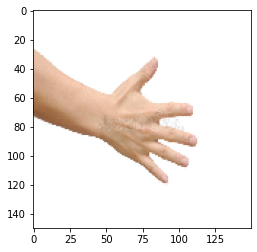

In [13]:
# Test Klasifikasi Model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')